In [1]:
import civicweb_scraper
import pandas as pd
from pathlib import Path
import glob
from csv import DictReader
import logging
import matplotlib.pyplot as plt

In [2]:
logger = civicweb_scraper.logger_setup()
# logger.setLevel(logging.DEBUG)
logger.setLevel(logging.INFO)

# Compile all documents

In [3]:
document_files = [doc for doc in glob.glob(f"{civicweb_scraper.TRACKING_FOLDER}/*_documents.csv")]
logger.debug(f"Found {len(document_files)} document files")

In [4]:
documents = []
for doc in document_files:
     with open(doc,'r') as f:
          dict_reader = DictReader(f)
          documents.extend(list(dict_reader))

In [5]:
df = pd.DataFrame(documents)

In [6]:
len_df= len(df)

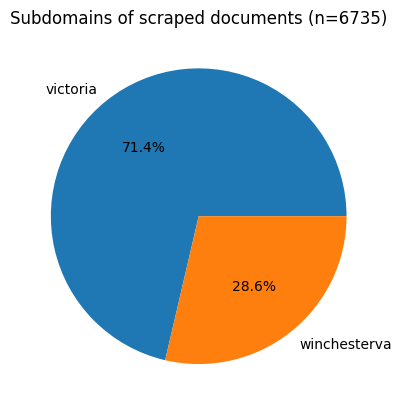

In [7]:
# create a pie chart of the type of file_types
plt.title(f"Subdomains of scraped documents (n={len_df})")
# df['subdomain'].value_counts().plot(kind='pie', autopct='%0.1f%%')
plt.pie(df['subdomain'].value_counts(), labels=df["subdomain"].unique(), autopct='%0.1f%%');

In [8]:
df["parent_folder"] = df["parent_path"].apply(lambda x: x.split("/")[-1])

In [25]:
df['parent_folder'].value_counts()

Index(['2021', '2023', '2022', '2019', '2020', '2018', '2017', '2024', '2016',
       '2014',
       ...
       'Parks & Recreation Committee - Sep 19 2017',
       'Parks & Recreation Committee - Jul 17 2017',
       'Parks & Recreation Committee - Jun 19 2017',
       'Parks & Recreation Committee - Apr 17 2017',
       'Parks & Recreation Committee - Mar 20 2017',
       'Parks & Recreation Committee - Jan 17 2017',
       'Parks & Recreation Committee - May 15 2017',
       'Parks & Recreation Committee - Aug 21 2017',
       'TEST Regular Council - Sep 23 2019',
       'Parks & Recreation Committee - Nov 20 2017'],
      dtype='object', name='parent_folder', length=344)

[724, 680, 640, 551, 503, 437, 377, 370, 229, 194]

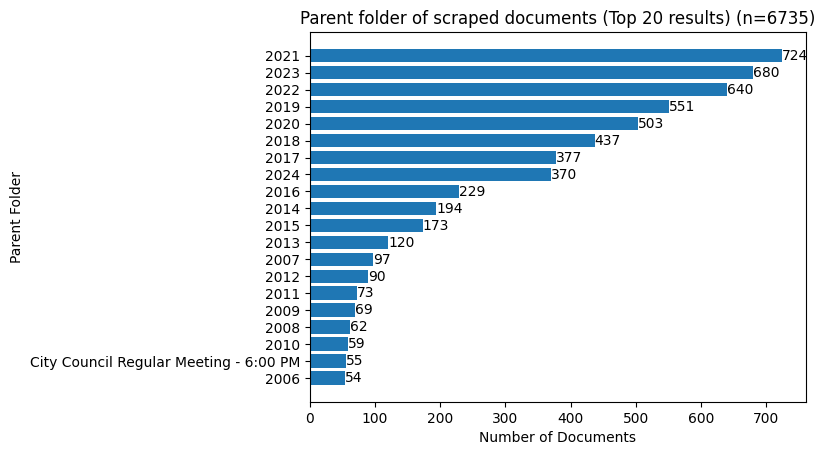

In [55]:

fig, ax = plt.subplots();
bars = ax.barh(width=list(df['parent_folder'].value_counts())[:20], y=df['parent_folder'].value_counts().index.to_list()[:20]);
ax.bar_label(bars)
plt.title(f"Parent folder of scraped documents (Top 20 results) (n={len_df})")
plt.ylabel("Parent Folder")
plt.xlabel("Number of Documents")
plt.gca().invert_yaxis()


In [ ]:
plt.title("First layer of scraped documents")
plt.pie(df['parent_folder'].value_counts(), labels=df["parent_folder"].unique(), autopct='%0.1f%%');


In [ ]:
plt.title("Pie graph of scraped documents file types")
df['parent_path'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [47]:
df['file_type'].unique()

array(['text/html', 'application/pdf',
       'application/vnd.openxmlformats-officedocument.spreadsheetml.sheet',
       ''], dtype=object)

In [48]:
df[df["file_type"]=="application/vnd.openxmlformats-officedocument.spreadsheetml.sheet"]

,name,file_type,subdomain,parent_path,root_url,url,parent_url,date_scraped,error,,'error',parent_folder
188,OTAC April 2021 Monthly Expenses.xlsx,application/vnd.openxmlformats-officedocument....,winchesterva,Agendas/Old Town Advancement Commission/Old To...,https://winchesterva.civicweb.net,/document/30032,/filepro/documents/15739,2024-07-30 19:39:28,,NaN,NaN,Old Town Development Board - 5:30 PM


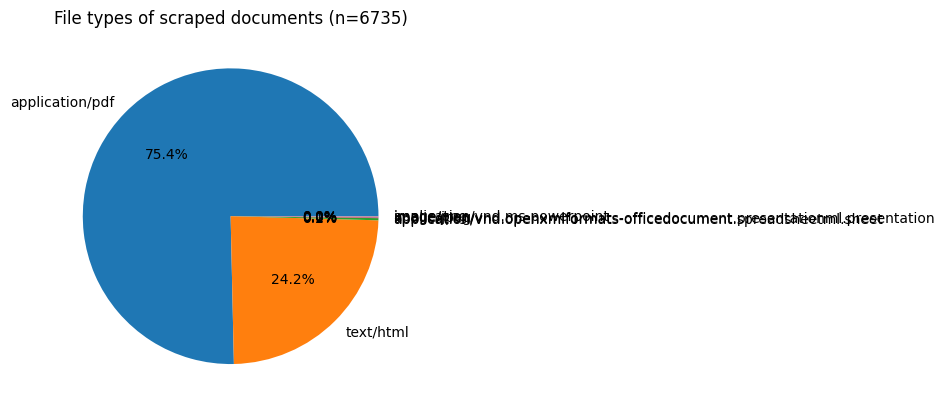

In [32]:
plt.title(f"File types of scraped documents (n={len_df})")
# df['file_type'].value_counts().plot(kind='pie', autopct='%0.1f%%')
plt.pie(df['file_type'].value_counts(), labels=df['file_type'].value_counts().index, autopct='%0.1f%%');

In [45]:
df['file_type'].value_counts().index

Index(['application/pdf', 'text/html',
       'application/vnd.openxmlformats-officedocument.spreadsheetml.sheet',
       'application/vnd.openxmlformats-officedocument.presentationml.presentation',
       'image/jpeg', '', 'image/png', 'application/vnd.ms-powerpoint'],
      dtype='object', name='file_type')

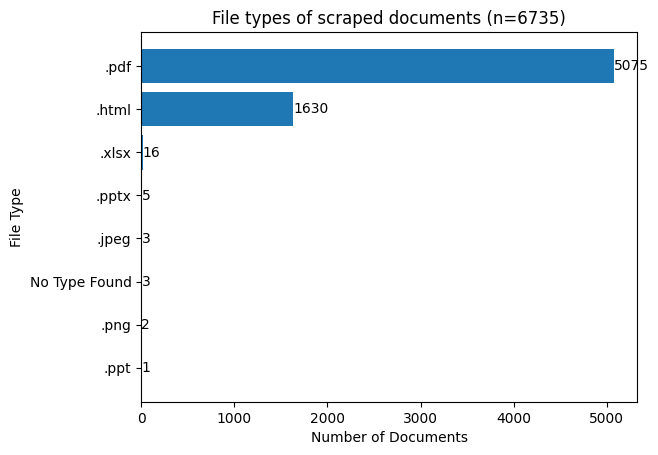

In [56]:

# df['file_type'].value_counts().plot(kind='pie', autopct='%0.1f%%')
fig, ax = plt.subplots();
bars = ax.barh(width=df['file_type'].value_counts(), y=[".pdf",".html", ".xlsx", ".pptx", ".jpeg", "No Type Found", ".png", ".ppt"]);
ax.bar_label(bars)
ax.set_xlabel("Number of Documents")
ax.set_ylabel("File Type")
plt.title(f"File types of scraped documents (n={len_df})")
plt.gca().invert_yaxis()


In [46]:
df['file_type'].value_counts()

file_type
application/pdf                                                              5075
text/html                                                                    1630
application/vnd.openxmlformats-officedocument.spreadsheetml.sheet              16
application/vnd.openxmlformats-officedocument.presentationml.presentation       5
image/jpeg                                                                      3
                                                                                3
image/png                                                                       2
application/vnd.ms-powerpoint                                                   1
Name: count, dtype: int64

In [48]:
df[df['file_type']=='application/vnd.ms-powerpoint']

,name,file_type,subdomain,parent_path,root_url,url,parent_url,date_scraped,error,parent_folder
1483,TEST.ppt,application/vnd.ms-powerpoint,victoria,Agendas/Agenda Attachments/Regular Council Mee...,https://victoria.civicweb.net,/document/14143,/filepro/documents/14142,2024-07-30 19:09:22,,Regular Council Meeting - May 11 2020
